In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from collections import defaultdict 
import numpy as np
%matplotlib inline

This workbook builds on logistic_regression to try and get more insight on training, and try different methods for picking a learning rate for gradient descent

In [2]:
df = pd.read_csv('ffs_player_year.csv')
df = df.loc[df.pos.isin(['d','f']), :] 

In [3]:
df['y'] = df['pos'].apply(lambda x: 1 if x == 'd' else 0) 

X = df[['clearances', 'blocks', 'interceptions', 'shots']].values
Y = df[['y']].values.flatten() 

In [4]:
print(X.shape); print(Y.shape)

(942, 4)
(942,)


In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def log_loss(w, X, Y):
    Y_p = sigmoid(X @ w)
    return np.sum(-((Y * np.log(Y_p)) + ((1-Y) * np.log(1-Y_p))))  

def logistic_gradient(w, X, Y):
    ''' return matrix of size Xj x Yj '''
    return X.T @ (Y - sigmoid(X @ w))

In [7]:
def get_batch_indices(n, batch_size):
    ''' return list of index arrays, where arrays are equal to batch size '''
    full_index = np.arange(n)
    np.random.shuffle(full_index)
    n_splits = n // batch_size
    return np.array_split(full_index, n_splits)

In [32]:
def fit_logistic_regression(X, Y, learning_rate, epochs, batch_size):
    # append bias to features 
    bias = np.ones((X.shape[0], 1))
    X = np.hstack((bias, X))
    w = np.zeros(X.shape[1])
    n = X.shape[0]
    step = 0
    results = defaultdict(list) 
    
    for epoch in range(epochs): 
        for batch_idx in get_batch_indices(n, batch_size):
            gradients = logistic_gradient(w, X[batch_idx], Y[batch_idx])
            gradients /= len(batch_idx) # use average gradient across records to make batch size comparison simpler
            w += gradients * learning_rate
            step += 0
            results['step'].append(step)
            results['weights'].append(w)
            results['gradients'].append(gradients)
            results['loss'].append(log_loss(w, X, Y)) 
    return results
        
           
#def fit_logistic_regression(w, X, y, steps, step_size):
    #for _ in range(steps): w += step_size * np.dot(X.T, y - (1 / (1 + np.exp(-np.dot(X, w))))) 

#### Batch gradient descent 
Gradient for all records computed at each step. 
Weights updated once per epoch. 

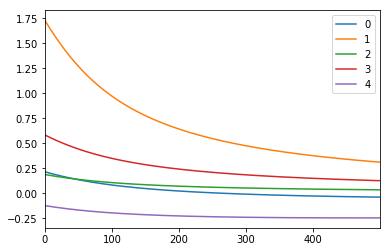

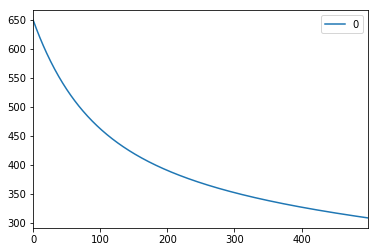

In [33]:
# learning rate too small 
results = fit_logistic_regression(X, Y,
    learning_rate=1e-3,
    epochs=500,
    batch_size=X.shape[0]
)
pd.DataFrame(results['gradients']).plot();
pd.DataFrame(results['loss']).plot();

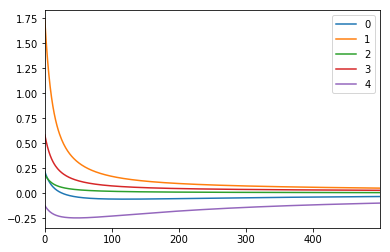

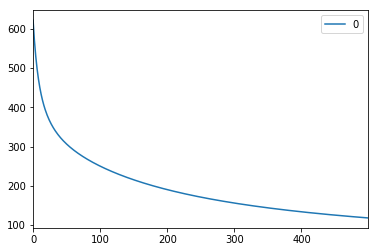

In [20]:
# learning rate way just right (ish) 
results = fit_logistic_regression(X, Y,
    learning_rate=1e-2,
    epochs=500,
    batch_size=X.shape[0]
)
pd.DataFrame(results['gradients']).plot();
pd.DataFrame(results['loss']).plot()

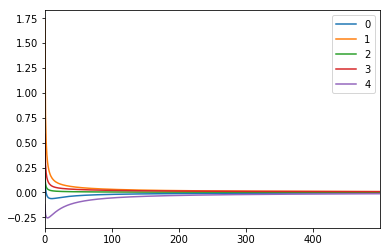

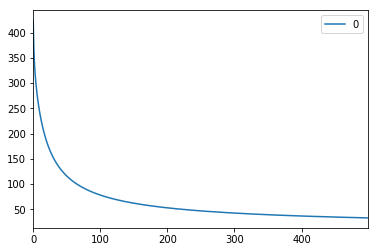

In [25]:
# learning rate too large
results = fit_logistic_regression(X, Y,
    learning_rate=1e-1,
    epochs=500,
    batch_size=X.shape[0]
)
pd.DataFrame(results['gradients']).plot();
pd.DataFrame(results['loss']).plot();

#### Stochastic gradient descent 
Gradient for a single record computed at each step. 
Weights updated n_records times per epoch. 

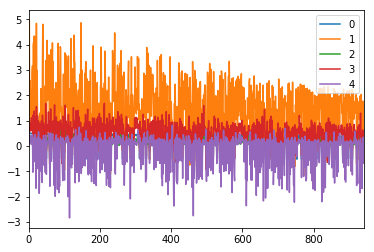

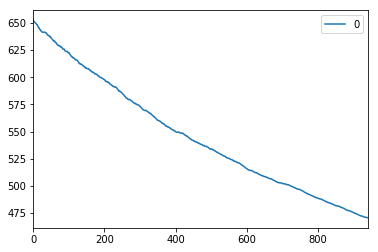

In [39]:
results = fit_logistic_regression(X, Y,
    learning_rate=1e-4,
    epochs=1,
    batch_size=1
)
pd.DataFrame(results['gradients']).plot();
pd.DataFrame(results['loss']).plot()

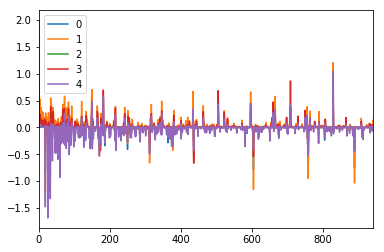

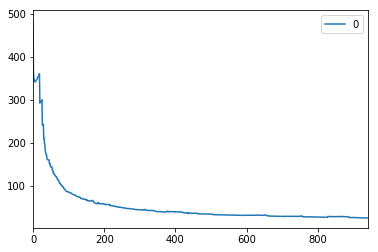

In [48]:
results = fit_logistic_regression(X, Y,
    learning_rate=1e-1,
    epochs=1,
    batch_size=1
)
pd.DataFrame(results['gradients']).plot();
pd.DataFrame(results['loss']).plot()

#### Mini-batch gradient descent 
Gradient for a group of n record computed at each step. 
Weights updated n_records / batch_size times per epoch. 

Combines the advantages of batch/stochastic gradient descent:
* not all data required to be in memory for gradient computation 
* easier to escape local minima as gradient is still less stable than batch, but more stable than stochastic 

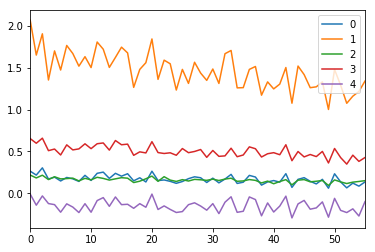

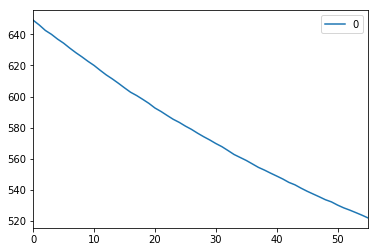

In [59]:
results = fit_logistic_regression(X, Y,
    learning_rate=1e-3,
    epochs=4,
    batch_size=64
)
pd.DataFrame(results['gradients']).plot();
pd.DataFrame(results['loss']).plot()

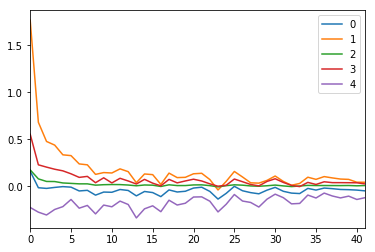

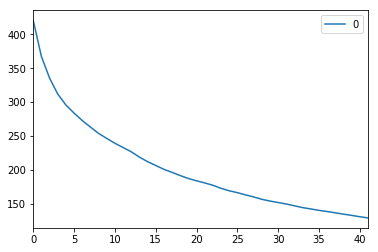

In [58]:
results = fit_logistic_regression(X, Y,
    learning_rate=1e-1,
    epochs=3,
    batch_size=64
)
pd.DataFrame(results['gradients']).plot();
pd.DataFrame(results['loss']).plot()